# Import the Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the Dataset

In [10]:
path = "/content/Data.xlsx"
df = pd.read_excel(path)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Selecting Independent and Dependent Values

In [11]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [12]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [13]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

#**Manage Missing Data**
#**strategy='mean'**

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [15]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#**Manage Missing Data**
#**strategy='median'**

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#**Encoding Categorical Data**

Non Numeric to Numeric data

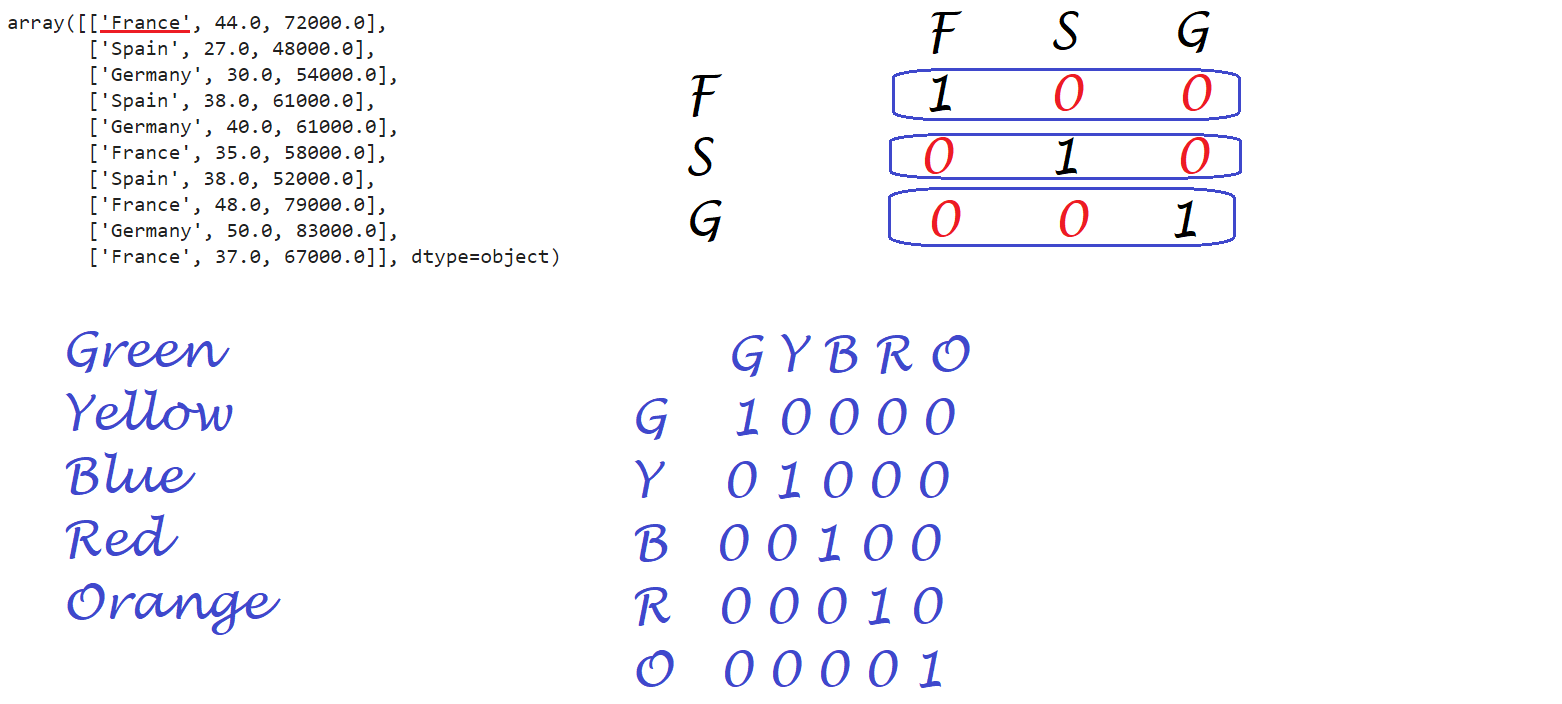

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#**Splitting the dataset into the Training set and Test set**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No'], dtype=object))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_train, X_test, y_train, y_test

(array([[1.0, 0.0, 0.0, 35.0, 58000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 50.0, 83000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object),
 array(['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No'], dtype=object),
 array(['No', 'Yes'], dtype=object))

#**Feature Selection**

In [22]:
kg, ltr, watt, pascal, fer, cel, dollar, pound, rupees, gallon, miles, km, kb, yard

NameError: ignored

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [25]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

#**New Dataset to work on**

In [50]:
path = "/content/Data3.xlsx"
df = pd.read_excel(path)
df

,Country,Age,Salary,Most_Freq,Constant,Purchased
0,France,44.0,72000.0,Pune,India,No
1,Spain,27.0,48000.0,Pune,India,Yes
2,Germany,30.0,54000.0,Mumbai,India,No
3,Spain,38.0,61000.0,Pune,India,No
4,Germany,40.0,NaN,Pune,India,Yes
5,France,35.0,58000.0,Nagpur,India,Yes
6,Spain,NaN,52000.0,Pune,India,No
7,France,48.0,79000.0,NaN,India,Yes
8,Germany,50.0,83000.0,Mumbai,India,No
9,France,37.0,67000.0,Pune,NaN,Yes


In [51]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, -1].values

In [52]:
X

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, nan, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', nan, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, nan, 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', nan]], dtype=object)

In [53]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [54]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, 63777.77777777778, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', 38.77777777777778, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, nan, 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', nan]], dtype=object)

In [55]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 3:4])
X[:, 3:4] = imputer.transform(X[:, 3:4])
X

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, 63777.77777777778, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', 38.77777777777778, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, 'Pune', 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', nan]], dtype=object)

In [56]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= "India")
imputer.fit(X[:, 4:5])
X[:, 4:5] = imputer.transform(X[:, 4:5])
X

array([['France', 44.0, 72000.0, 'Pune', 'India'],
       ['Spain', 27.0, 48000.0, 'Pune', 'India'],
       ['Germany', 30.0, 54000.0, 'Mumbai', 'India'],
       ['Spain', 38.0, 61000.0, 'Pune', 'India'],
       ['Germany', 40.0, 63777.77777777778, 'Pune', 'India'],
       ['France', 35.0, 58000.0, 'Nagpur', 'India'],
       ['Spain', 38.77777777777778, 52000.0, 'Pune', 'India'],
       ['France', 48.0, 79000.0, 'Pune', 'India'],
       ['Germany', 50.0, 83000.0, 'Mumbai', 'India'],
       ['France', 37.0, 67000.0, 'Pune', 'India']], dtype=object)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 37.0, 67000.0]], dtype=object)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 50.0, 83000.0]], dtype=object),
 array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes'], dtype=object),
 array(['No', 'No'], dtype=object))

In [59]:
sc = StandardScaler()
X_train[:, 7:] = sc.fit_transform(X_train[:, 7:])
X_test[:, 7:] = sc.transform(X_test[:, 7:])
X_train

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.2630675731713538,
        0.1238147854838185],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, -0.25350147960148617,
        0.4617563176278856],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, -1.9753983221776195,
        -1.5309334063940294],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.05261351463427101,
        -1.1114197802841526],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.6405850472322605,
        1.7202971959575162],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, -0.08131179534387283,
        -0.16751412153692966],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.9518263102018072,
        0.9861483502652316],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, -0.5978808481167128,
        -0.48214934111933727]], dtype=object)